<a href="https://colab.research.google.com/github/r-zambotti/Data_Analytics_Datathon_Grupo-60/blob/main/Data_Analytics_Datathon_Grupo_60.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Datathon - Passos Mágicos**

## **1 - Introdução**

  ## **2 - 	Objetivo Geral**

## **3 - Material e Ferramentas**

## **4 - Importação dos dados**

- Instalação de pacotes

- Import das bibliotecas

In [205]:
import pandas as pd
import numpy as np
from datetime import datetime
import unicodedata
import re
import requests
import base64
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings(action = 'ignore')



In [206]:
# URLs GITH
url_xlsx = "https://raw.githubusercontent.com/r-zambotti/Data_Analytics_Datathon_Grupo-60/main/Bases/PEDE_PASSOS_2024.xlsx"
url_csv = "https://raw.githubusercontent.com/r-zambotti/Data_Analytics_Datathon_Grupo-60/main/Bases/PEDE_PASSOS_DATASET_FIAP.csv"

# Baixar os arquivos no Colab
!wget -O PEDE_PASSOS_2024.xlsx {url_xlsx}
!wget -O PEDE_PASSOS_DATASET_FIAP.csv {url_csv}

# Carregar o Excel (todas as guias)
df_pede_2022= pd.read_excel("PEDE_PASSOS_2024.xlsx", sheet_name="PEDE2022")
df_pede_2023= pd.read_excel("PEDE_PASSOS_2024.xlsx", sheet_name="PEDE2023")
df_pede_2024= pd.read_excel("PEDE_PASSOS_2024.xlsx", sheet_name="PEDE2024")

# Carregar o CSV
df_pede_2020 = pd.read_csv("PEDE_PASSOS_DATASET_FIAP.csv", sep = ';')

--2025-02-09 16:03:09--  https://raw.githubusercontent.com/r-zambotti/Data_Analytics_Datathon_Grupo-60/main/Bases/PEDE_PASSOS_2024.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2300561 (2.2M) [application/octet-stream]
Saving to: ‘PEDE_PASSOS_2024.xlsx’

PEDE_PASSOS_2024.xl 100%[===================>]   2.19M  --.-KB/s    in 0.07s   

2025-02-09 16:03:09 (30.5 MB/s) - ‘PEDE_PASSOS_2024.xlsx’ saved [2300561/2300561]

--2025-02-09 16:03:09--  https://raw.githubusercontent.com/r-zambotti/Data_Analytics_Datathon_Grupo-60/main/Bases/PEDE_PASSOS_DATASET_FIAP.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.1

In [207]:
df_pede_2022.head(5)

,RA,Fase,Turma,Nome,Ano nasc,Idade 22,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,...,Inglês,Indicado,Atingiu PV,IPV,IAN,Fase ideal,Defas,Destaque IEG,Destaque IDA,Destaque IPV
0,RA-1,7,A,Aluno-1,2003,19,Menina,2016,Escola Pública,Ametista,...,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
1,RA-2,7,A,Aluno-2,2005,17,Menina,2017,Rede Decisão,Ametista,...,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
2,RA-3,7,A,Aluno-3,2005,17,Menina,2016,Rede Decisão,Ametista,...,6.9,Não,Não,7.556,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...
3,RA-4,7,A,Aluno-4,2005,17,Menino,2017,Rede Decisão,Ametista,...,8.7,Não,Não,5.278,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
4,RA-5,7,A,Aluno-5,2005,17,Menina,2016,Rede Decisão,Ametista,...,5.7,Não,Não,7.389,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...


In [208]:
df_pede_2023.head(5)

,RA,Fase,INDE 2023,Pedra 2023,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,...,Indicado,Atingiu PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Destaque IPV.1
0,RA-861,ALFA,9.31095,Topázio,ALFA A - G0/G1,Aluno-861,6/17/2015,8,Feminino,2023,...,NaN,NaN,8.920,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
1,RA-862,ALFA,8.22120,Topázio,ALFA A - G0/G1,Aluno-862,5/31/2014,9,Masculino,2023,...,NaN,NaN,8.585,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,NaN
2,RA-863,ALFA,5.92975,Quartzo,ALFA A - G0/G1,Aluno-863,2/25/2016,7,Masculino,2023,...,NaN,NaN,6.260,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
3,RA-864,ALFA,7.03400,Ametista,ALFA A - G0/G1,Aluno-864,2015-12-03 00:00:00,1900-01-08 00:00:00,Feminino,2023,...,NaN,NaN,8.500,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
4,RA-865,ALFA,8.15520,Topázio,ALFA A - G0/G1,Aluno-865,11/13/2014,8,Masculino,2023,...,NaN,NaN,7.915,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN


In [209]:
df_pede_2024.head(5)

,RA,Fase,INDE 2024,Pedra 2024,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,...,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Escola,Ativo/ Inativo,Ativo/ Inativo.1
0,RA-1275,ALFA,7.611367,Ametista,ALFA A - G0/G1,Aluno-1275,2016-07-28,8,Masculino,2024,...,5.446667,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
1,RA-1276,ALFA,8.002867,Topázio,ALFA A - G0/G1,Aluno-1276,2016-10-16,8,Feminino,2024,...,7.050000,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
2,RA-1277,ALFA,7.9522,Ametista,ALFA A - G0/G1,Aluno-1277,2016-08-16,8,Masculino,2024,...,7.046667,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Dom Pedro Villas Boas de Souza,Cursando,Cursando
3,RA-868,ALFA,7.156367,Ametista,ALFA A - G0/G1,Aluno-868,2015-11-08,8,Masculino,2023,...,7.213333,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
4,RA-1278,ALFA,5.4442,Quartzo,ALFA A - G0/G1,Aluno-1278,2015-03-22,9,Masculino,2024,...,4.173333,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,EM Etelvina Delfim Simões,Cursando,Cursando


## **5 - Tratamento dos Dados**

### - 5.1 - Ajustando as colunas que serão utilizadas

In [210]:
df_pede_2023.drop(columns=['INDE 23'], inplace=True, errors='ignore')
df_pede_2023.drop(columns=['Pedra 23'], inplace=True, errors='ignore')

In [211]:
# Alterar os valores na coluna 'genero'
df_pede_2022['Gênero'] = df_pede_2022['Gênero'].replace({'Menina': 'Feminino', 'Menino': 'Masculino'})

In [212]:
df_pede_2023.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RA                     1014 non-null   object 
 1   Fase                   1014 non-null   object 
 2   INDE 2023              931 non-null    float64
 3   Pedra 2023             931 non-null    object 
 4   Turma                  1014 non-null   object 
 5   Nome Anonimizado       1014 non-null   object 
 6   Data de Nasc           1014 non-null   object 
 7   Idade                  1014 non-null   object 
 8   Gênero                 1014 non-null   object 
 9   Ano ingresso           1014 non-null   int64  
 10  Instituição de ensino  1014 non-null   object 
 11  Pedra 20               240 non-null    object 
 12  Pedra 21               335 non-null    object 
 13  Pedra 22               600 non-null    object 
 14  INDE 22                600 non-null    float64
 15  Cg  

In [213]:
rename_cols = {
    "RA": "ra",
    "Fase": "fase",
    "Turma": "turma",
    "Nome": "nome",
    "Nome Anonimizado": "nome",
    "Ano nasc": "ano_nasc",
    "Data de Nasc": "ano_nasc",
    "Idade 22": "idade",
    "Idade": "idade",
    "Gênero": "genero",
    "Ano ingresso": "ano_ingresso",
    "Instituição de ensino": "inst_ensino",
    "Pedra 20": "pedra_20",
    "Pedra 21": "pedra_21",
    "Pedra 22": "pedra_22",
    "INDE 22": "inde_22",
    "INDE 2023": "inde_23",
    "INDE 23": "inde_23",
    "Pedra 2023": "pedra_23",
    "Pedra 23": "pedra_23",
    "INDE 2024": "inde_24",
    "Pedra 2024": "pedra_24",
    "IAN": "ian",
    "IDA": "ida",
    "IEG": "ieg",
    "IAA": "iaa",
    "IPS": "ips",
    "IPP": "ipp",
    "IPV": "ipv",
    "Atingiu PV": "atingiu_pv",
    "Matem": "matematica",
    "Mat": "matematica",
    "Portug": "portugues",
    "Por": "portugues",
    "Inglês": "ingles",
    "Ing": "ingles",
    "Fase ideal" : "fase_ideal",
    "Fase Ideal" : "fase_ideal",
    "Defasagem" : "defasagem",
    "Defas" : "defasagem"
}

df_pede_2022.rename(columns=rename_cols, inplace=True)
df_pede_2023.rename(columns=rename_cols, inplace=True)
df_pede_2024.rename(columns=rename_cols, inplace=True)

In [214]:
# Coluna 'ano' em cada DataFrame
df_pede_2022['ano_letivo'] = 2022
df_pede_2023['ano_letivo'] = 2023
df_pede_2024['ano_letivo'] = 2024

In [215]:
df_alunos_22 = df_pede_2022[['ano_letivo','ra','nome','fase','turma','ano_nasc','idade','genero','ano_ingresso','inst_ensino','pedra_22',
                             'inde_22','ian','ida','ieg','iaa','ips','ipv','atingiu_pv','matematica','portugues','ingles','defasagem','fase_ideal']]

df_alunos_23 = df_pede_2023[['ano_letivo','ra','nome','fase','turma','ano_nasc','idade','genero','ano_ingresso','inst_ensino','pedra_23',
                             'inde_23','ian','ida','ieg','iaa','ips','ipp','ipv','atingiu_pv','matematica','portugues','ingles','defasagem','fase_ideal']]

df_alunos_24 = df_pede_2024[['ano_letivo','ra','nome','fase','turma','ano_nasc','idade','genero','ano_ingresso','inst_ensino','pedra_24',
                            'inde_24','ian','ida','ieg','iaa','ips','ipp','ipv','atingiu_pv','matematica','portugues','ingles','defasagem','fase_ideal']]

In [216]:
print(df_alunos_22.shape)
print(df_alunos_23.shape)
print(df_alunos_24.shape)

(860, 24)
(1014, 25)
(1156, 25)


### 5.2 - Criando dataframe de pedra de anos anteriores

In [217]:
df_pedra_20 = df_pede_2022[['ra', 'nome', 'ano_nasc', 'genero', 'pedra_20']].dropna(subset=['pedra_20'])
df_pedra_21 = df_pede_2022[['ra', 'nome', 'ano_nasc', 'genero', 'pedra_21']].dropna(subset=['pedra_21'])

In [218]:
df_pedra_20.insert(loc=0, column='ano_letivo', value=2020)
df_pedra_21.insert(loc=0, column='ano_letivo', value=2021)

In [219]:
# Adicionar a coluna idade com base no ano de nascimento
df_pedra_20['idade'] = df_pedra_20['ano_letivo'] - df_pedra_20['ano_nasc'].apply(pd.to_numeric, errors='coerce')
df_pedra_21['idade'] = df_pedra_21['ano_letivo'] - df_pedra_21['ano_nasc'].apply(pd.to_numeric, errors='coerce')

# Exibir as primeiras linhas do DataFrame atualizado para verificar
print(df_pedra_20.head())
print(df_pedra_21.head())

   ano_letivo    ra     nome  ano_nasc     genero  pedra_20  idade
0        2020  RA-1  Aluno-1      2003   Feminino  Ametista     17
1        2020  RA-2  Aluno-2      2005   Feminino  Ametista     15
2        2020  RA-3  Aluno-3      2005   Feminino  Ametista     15
3        2020  RA-4  Aluno-4      2005  Masculino  Ametista     15
4        2020  RA-5  Aluno-5      2005   Feminino  Ametista     15
   ano_letivo    ra     nome  ano_nasc     genero  pedra_21  idade
0        2021  RA-1  Aluno-1      2003   Feminino  Ametista     18
1        2021  RA-2  Aluno-2      2005   Feminino  Ametista     16
2        2021  RA-3  Aluno-3      2005   Feminino  Ametista     16
3        2021  RA-4  Aluno-4      2005  Masculino  Ametista     16
4        2021  RA-5  Aluno-5      2005   Feminino  Ametista     16


In [220]:
print(df_pedra_20.shape)
print(df_pedra_21.shape)

(323, 7)
(462, 7)


In [221]:
df_pedra_20.rename(columns={'pedra_20': 'pedra'}, inplace=True)
df_pedra_21.rename(columns={'pedra_21': 'pedra'}, inplace=True)

In [222]:
df_pedras = pd.concat([df_pedra_20, df_pedra_21], axis=0, ignore_index=True)

In [223]:
df_pedras

,ano_letivo,ra,nome,ano_nasc,genero,pedra,idade
0,2020,RA-1,Aluno-1,2003,Feminino,Ametista,17
1,2020,RA-2,Aluno-2,2005,Feminino,Ametista,15
2,2020,RA-3,Aluno-3,2005,Feminino,Ametista,15
3,2020,RA-4,Aluno-4,2005,Masculino,Ametista,15
4,2020,RA-5,Aluno-5,2005,Feminino,Ametista,15
...,...,...,...,...,...,...,...
780,2021,RA-805,Aluno-805,2014,Masculino,Ametista,7
781,2021,RA-810,Aluno-810,2014,Masculino,Ametista,7
782,2021,RA-811,Aluno-811,2013,Feminino,Ágata,8
783,2021,RA-823,Aluno-823,2012,Feminino,Ágata,9


### 5.3 - Tratamento das colunas e valores

In [224]:
# Converter a coluna dt_nasc para datetime, forçando erros como NaT quando necessário
df_alunos_23["ano_nasc"] = pd.to_datetime(df_alunos_23["ano_nasc"], errors="coerce")
df_alunos_24["ano_nasc"] = pd.to_datetime(df_alunos_24["ano_nasc"], errors="coerce")

# Extrair apenas o ano
df_alunos_23["ano_nasc"] = df_alunos_23["ano_nasc"].dt.year
df_alunos_24["ano_nasc"] = df_alunos_24["ano_nasc"].dt.year

# Calcular a idade com base em 2023
df_alunos_23["idade"] = 2023 - df_alunos_23["ano_nasc"]
df_alunos_24["idade"] = 2024 - df_alunos_24["ano_nasc"]

In [225]:
# Alterando o valor 0 por ALFA na coluna fase
df_alunos_22['fase'] = df_alunos_22['fase'].replace(0, 'ALFA')

# Atualizar as colunas 'fase' e 'turma'
df_alunos_23[['fase', 'turma']] = df_alunos_23['turma'].str.extract(r'(\d+|[A-Za-z]+)\s*([A-Za-z]?)')
df_alunos_24[['fase', 'turma']] = df_alunos_24['turma'].str.extract(r'(\d+|[A-Za-z]+)\s*([A-Za-z]?)')
df_alunos_24[['fase', 'turma']] = df_alunos_24[['fase', 'turma']].fillna('9')

In [226]:
print('2022',df_alunos_22[["fase", "turma"]].head(2))
print('2022',df_alunos_22[["fase", "turma"]].tail(2))

2022   fase turma
0    7     A
1    7     A
2022      fase turma
858  ALFA     Z
859  ALFA     Z


In [227]:
print('2023',df_alunos_23[["fase", "turma"]].head(2))
print('2023',df_alunos_23[["fase", "turma"]].tail(2))

2023    fase turma
0  ALFA     A
1  ALFA     A
2023      fase turma
1012    8     E
1013    8     E


In [228]:
print('2024',df_alunos_24[["fase", "turma"]].head(5))
print('2024',df_alunos_24[["fase", "turma"]].tail(5))

2024    fase turma
0  ALFA     A
1  ALFA     A
2  ALFA     A
3  ALFA     A
4  ALFA     A
2024      fase turma
1151    7     A
1152    7     E
1153    6     L
1154    8     F
1155    7     E


In [229]:
# Verificar valores nulos em cada DataFrame
print("Valores nulos em df_alunos_22:\n", df_alunos_22.isnull().sum())
print("\nValores nulos em df_alunos_23:\n", df_alunos_23.isnull().sum())
print("\nValores nulos em df_alunos_24:\n", df_alunos_24.isnull().sum())

Valores nulos em df_alunos_22:
 ano_letivo        0
ra                0
nome              0
fase              0
turma             0
ano_nasc          0
idade             0
genero            0
ano_ingresso      0
inst_ensino       0
pedra_22          0
inde_22           0
ian               0
ida               0
ieg               0
iaa               0
ips               0
ipv               0
atingiu_pv        0
matematica        2
portugues         2
ingles          577
defasagem         0
fase_ideal        0
dtype: int64

Valores nulos em df_alunos_23:
 ano_letivo         0
ra                 0
nome               0
fase               0
turma              0
ano_nasc           0
idade              0
genero             0
ano_ingresso       0
inst_ensino        0
pedra_23          83
inde_23           83
ian                0
ida               77
ieg               76
iaa               63
ips               69
ipp               76
ipv               76
atingiu_pv      1014
matematica        77
p

In [230]:
df_alunos_22.rename(columns={'pedra_22': 'pedra','inde_22':'inde'}, inplace=True)
df_alunos_23.rename(columns={'pedra_23': 'pedra','inde_23':'inde'}, inplace=True)
df_alunos_24.rename(columns={'pedra_24': 'pedra','inde_24':'inde'}, inplace=True)

In [231]:
df_alunos = pd.concat([df_alunos_22, df_alunos_23, df_alunos_24], axis=0, ignore_index=True)
df_alunos

,ano_letivo,ra,nome,fase,turma,ano_nasc,idade,genero,ano_ingresso,inst_ensino,...,iaa,ips,ipv,atingiu_pv,matematica,portugues,ingles,defasagem,fase_ideal,ipp
0,2022,RA-1,Aluno-1,7,A,2003,19,Feminino,2016,Escola Pública,...,8.300,5.6000,7.278,Não,2.70,3.5,6.0,-1,Fase 8 (Universitários),NaN
1,2022,RA-2,Aluno-2,7,A,2005,17,Feminino,2017,Rede Decisão,...,8.800,6.3000,6.778,Não,6.30,4.5,9.7,0,Fase 7 (3º EM),NaN
2,2022,RA-3,Aluno-3,7,A,2005,17,Feminino,2016,Rede Decisão,...,0.000,5.6000,7.556,Não,5.80,4.0,6.9,0,Fase 7 (3º EM),NaN
3,2022,RA-4,Aluno-4,7,A,2005,17,Masculino,2017,Rede Decisão,...,8.800,5.6000,5.278,Não,2.80,3.5,8.7,0,Fase 7 (3º EM),NaN
4,2022,RA-5,Aluno-5,7,A,2005,17,Feminino,2016,Rede Decisão,...,7.900,5.6000,7.389,Não,7.00,2.9,5.7,0,Fase 7 (3º EM),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,2024,RA-92,Aluno-92,7,A,2006,18,Feminino,2021,Privada - Programa de Apadrinhamento,...,10.002,7.5100,6.330,NaN,8.00,5.0,9.5,0,Fase 7 (3° EM),7.8125
3026,2024,RA-93,Aluno-93,7,E,2007,17,Feminino,2021,Privada - Programa de Apadrinhamento,...,9.168,6.2575,7.500,NaN,6.75,7.2,8.5,1,Fase 6 (2° EM),7.5000
3027,2024,RA-94,Aluno-94,6,L,2007,17,Feminino,2021,Privada - Programa de Apadrinhamento,...,10.002,6.2600,8.200,NaN,7.00,7.0,10.0,0,Fase 6 (2° EM),8.3750
3028,2024,RA-96,Aluno-96,8,F,2006,18,Masculino,2021,Concluiu o 3º EM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Fase 8 (Universitários),NaN


In [232]:
df_alunos["fase_ideal"].value_counts()

,count
fase_ideal,
Fase 2 (5° e 6° ano),527
Fase 3 (7° e 8° ano),437
Fase 1 (3° e 4° ano),290
Fase 2 (5º e 6º ano),218
Fase 3 (7º e 8º ano),207
Fase 8 (Universitários),200
Fase 4 (9° ano),186
ALFA (1° e 2° ano),165
Fase 5 (1° EM),161


In [233]:
rename_fase = {
              "ALFA (1° e 2° ano)"      : "ALFA",
              "ALFA (2° e 3° ano)"      : "ALFA",
              "ALFA  (2º e 3º ano)"     : "ALFA",
              "Fase 1 (3° e 4° ano)"    : 1,
              "Fase 1 (4º ano)"         : 1,
              "Fase 2 (5° e 6° ano)"    : 2,
              "Fase 2 (5º e 6º ano)"    : 2,
              "Fase 3 (7° e 8° ano)"    : 3,
              "Fase 3 (7º e 8º ano)"    : 3,
              "Fase 4 (9° ano)"         : 4,
              "Fase 4 (9º ano)"         : 4,
              "Fase 5 (1° EM)"          : 5,
              "Fase 5 (1º EM)"          : 5,
              "Fase 6 (2° EM)"          : 6,
              "Fase 6 (2º EM)"          : 6,
              "Fase 7 (3° EM)"          : 7,
              "Fase 7 (3º EM)"          : 7,
              "Fase 8 (Universitários)" : 8
            }

df_alunos['fase_ideal'] = df_alunos['fase_ideal'].replace(rename_fase)

In [234]:
df_alunos['fase_ideal'].value_counts()

,count
fase_ideal,
2,745
3,644
1,386
4,271
ALFA,236
5,224
8,200
6,177
7,147


In [235]:
rename_inst = {
               'Escola Pública' : 'publica',
               'Rede Decisão' : 'bolsista',
               'Escola JP II' : 'bolsista',
               'Pública	escola' : 'publica',
               'Privada - Programa de Apadrinhamento' : 'bolsista',
               'Privada *Parcerias com Bolsa 100%' : 'bolsista',
               'Privada	escola' : 'bolsista',
               'Privada - Pagamento por *Empresa Parceira' : 'bolsista',
               'Concluiu o 3º EM' :	'Concluiu',
               'Nenhuma das opções acima' :	'bolsista',
               'Privada - Programa de apadrinhamento' :	'bolsista',
               'Pública	escola' : 'publica',
               'Privada - Programa de Apadr' : 'bolsista',
               'Privada - Programa de apadrinhamento' : 'bolsista',
               'Pública	escola' : 'publica',
               'Privada - Programa de Apadrinhamento' :	'bolsista',
               'Privada' :	'bolsista',
               'Privada *Parcerias com Bolsa 100%' :	'bolsista',
               'Bolsista Universitário *Formado (a)' :	'bolsista',
               'Privada - Pagamento por *Empresa Parceira	escola' : 'bolsista',
               'Concluiu o 3º EM' :	'Concluiu',
               'Privada - Programa de apadrinhamento' :	'bolsista',
               'Pública' :	'publica',
                pd.NA: 'publica',  # Para valores NaN específicos do Pandas
              }

df_alunos['inst_ensino'] = df_alunos['inst_ensino'].replace(rename_inst)

In [236]:
print(df_alunos.isna().sum())

ano_letivo         0
ra                 0
nome               0
fase               0
turma              0
ano_nasc           0
idade              0
genero             0
ano_ingresso       0
inst_ensino        0
pedra            147
inde             147
ian                0
ida              178
ieg               76
iaa              165
ips              171
ipv              178
atingiu_pv      2170
matematica       184
portugues        185
ingles          1939
defasagem          0
fase_ideal         0
ipp             1038
dtype: int64


In [237]:
# Lista das colunas a serem preenchidas com 0
cols_to_fill = ["matematica", "portugues", "ingles"]

# Substituir NaN por 0 nas colunas especificadas
df_alunos[cols_to_fill] = df_alunos[cols_to_fill].fillna(0)

In [238]:
# Lista dos alunos que  precisam ser calculados os INDE
ra_list = ["RA-145", "RA-254", "RA-265", "RA-267", "RA-1126", "RA-1188", "RA-1189"]

# Aplicar a fórmula somente para os RAs específicos
df_alunos.loc[df_alunos["ra"].isin(ra_list) & df_alunos["inde"].isna(), "inde"] = (
    df_alunos["ian"] * 0.1 +
    df_alunos["ida"].fillna(0) * 0.2 +
    df_alunos["ieg"] * 0.2 +
    df_alunos["iaa"] * 0.1 +
    df_alunos["ips"].fillna(0) * 0.1 +
    df_alunos["ipv"] * 0.2 +
    df_alunos["ipp"] * 0.1
)


In [239]:
# Lista das colunas a serem preenchidas com 0
cols_to_fill = ["inde", "ian", "ida", "ieg", "iaa", "ips", "ipv","ipp"]

# Substituir "X" por 0 na coluna "inde", se existir
if "inde" in df_alunos.columns:
    df_alunos["inde"] = df_alunos["inde"].replace(["INCLUIR"], 0)

# Substituir NaN por 0 nas colunas especificadas
df_alunos[cols_to_fill] = df_alunos[cols_to_fill].fillna(0)

# Verificar as mudanças aplicadas na coluna "inde"
df_alunos["inde"].unique()


array([5.783     , 7.055     , 6.591     , ..., 8.27555   , 8.63703333,
       8.61745   ])

In [240]:
df_alunos[['inde', 'ian', 'ida', 'ieg', 'iaa', 'ips', 'ipp','ipv']] = df_alunos[['inde', 'ian', 'ida', 'ieg', 'iaa', 'ips', 'ipp','ipv']].astype(float).round(2)

In [241]:
# Substituir NaN ou "INCLUIR" por "nao_informado" na coluna "pedra", se existir
if "pedra" in df_alunos.columns:
  df_alunos["pedra"] = df_alunos["pedra"].replace(["INCLUIR", pd.NA, None], "nao_informado")

In [242]:
print(df_alunos.isna().sum())

ano_letivo         0
ra                 0
nome               0
fase               0
turma              0
ano_nasc           0
idade              0
genero             0
ano_ingresso       0
inst_ensino        0
pedra              0
inde               0
ian                0
ida                0
ieg                0
iaa                0
ips                0
ipv                0
atingiu_pv      2170
matematica         0
portugues          0
ingles             0
defasagem          0
fase_ideal         0
ipp                0
dtype: int64


In [243]:
df_alunos

,ano_letivo,ra,nome,fase,turma,ano_nasc,idade,genero,ano_ingresso,inst_ensino,...,iaa,ips,ipv,atingiu_pv,matematica,portugues,ingles,defasagem,fase_ideal,ipp
0,2022,RA-1,Aluno-1,7,A,2003,19,Feminino,2016,publica,...,8.30,5.60,7.28,Não,2.70,3.5,6.0,-1,8,0.00
1,2022,RA-2,Aluno-2,7,A,2005,17,Feminino,2017,bolsista,...,8.80,6.30,6.78,Não,6.30,4.5,9.7,0,7,0.00
2,2022,RA-3,Aluno-3,7,A,2005,17,Feminino,2016,bolsista,...,0.00,5.60,7.56,Não,5.80,4.0,6.9,0,7,0.00
3,2022,RA-4,Aluno-4,7,A,2005,17,Masculino,2017,bolsista,...,8.80,5.60,5.28,Não,2.80,3.5,8.7,0,7,0.00
4,2022,RA-5,Aluno-5,7,A,2005,17,Feminino,2016,bolsista,...,7.90,5.60,7.39,Não,7.00,2.9,5.7,0,7,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,2024,RA-92,Aluno-92,7,A,2006,18,Feminino,2021,bolsista,...,10.00,7.51,6.33,NaN,8.00,5.0,9.5,0,7,7.81
3026,2024,RA-93,Aluno-93,7,E,2007,17,Feminino,2021,bolsista,...,9.17,6.26,7.50,NaN,6.75,7.2,8.5,1,6,7.50
3027,2024,RA-94,Aluno-94,6,L,2007,17,Feminino,2021,bolsista,...,10.00,6.26,8.20,NaN,7.00,7.0,10.0,0,6,8.38
3028,2024,RA-96,Aluno-96,8,F,2006,18,Masculino,2021,Concluiu,...,0.00,0.00,0.00,NaN,0.00,0.0,0.0,0,8,0.00


In [244]:
def remove_accents(text):
    if pd.isna(text):
        return text
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('ASCII')
    return text

df_alunos['pedra'] = df_alunos['pedra'].apply(remove_accents)
df_pedras['pedra'] = df_pedras['pedra'].apply(remove_accents)

In [245]:
print(df_alunos['pedra'].value_counts())

pedra
Ametista         1120
Agata             721
Topazio           688
Quartzo           316
nao_informado     185
Name: count, dtype: int64


In [246]:
print(df_pedras['pedra'].value_counts())

pedra
Ametista    388
Agata       168
Topazio     147
Quartzo      82
Name: count, dtype: int64


In [247]:
df_alunos.describe()

,ano_letivo,ano_nasc,idade,ano_ingresso,inde,ian,ida,ieg,iaa,ips,ipv,matematica,portugues,ingles,defasagem,ipp
count,3030.00000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000
mean,2023.09769,2010.454455,12.643234,2021.563696,6.840290,7.179043,6.001429,7.746337,7.486746,5.932386,7.102330,5.787426,6.038036,2.264604,-0.642904,4.966878
std,0.80995,3.314445,3.315746,1.822171,1.962152,2.535266,2.419101,2.461795,3.122499,2.266587,2.063089,2.751149,2.582062,3.435804,0.866382,3.665900
min,2022.00000,1996.000000,7.000000,2016.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,2022.00000,2008.000000,10.000000,2021.000000,6.520000,5.000000,4.750000,7.200000,7.500000,5.000000,6.792500,4.300000,4.800000,0.000000,-1.000000,0.000000
50%,2023.00000,2011.000000,12.000000,2022.000000,7.300000,5.000000,6.500000,8.500000,8.500000,6.900000,7.500000,6.000000,6.500000,0.000000,-1.000000,7.080000
75%,2024.00000,2013.000000,15.000000,2023.000000,7.950000,10.000000,7.800000,9.397500,9.500000,7.510000,8.220000,8.000000,8.000000,5.000000,0.000000,7.810000
max,2024.00000,2017.000000,28.000000,2024.000000,9.530000,10.000000,10.000000,10.000000,10.000000,10.000000,10.010000,10.000000,10.000000,10.000000,3.000000,10.000000


## **6 - Analise exploratória**

### 6.1 - Analise Classificação dos Alunos por categoria (PEDRA)

- Quartzo  – 2,405 a 5,506
- Agata    – 5,506 a 6,868
- Ametista – 6,868 a 8,230
- Topazio  – 8,230 a 9,294

In [248]:
# Criando Dicionário de cores para cada tipo de pedra
cores = {
    'Quartzo': 'red',
    'Agata': 'yellow',
    'Ametista': 'lightblue',
    'Topazio': 'lightgreen'
}

In [249]:
# Concatenando as pedra dos anos 2020 a 2024
df_pedra_geral = pd.concat([df_pedras,df_alunos])

In [250]:
df_pedra_geral

,ano_letivo,ra,nome,ano_nasc,genero,pedra,idade,fase,turma,ano_ingresso,...,iaa,ips,ipv,atingiu_pv,matematica,portugues,ingles,defasagem,fase_ideal,ipp
0,2020,RA-1,Aluno-1,2003,Feminino,Ametista,17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,RA-2,Aluno-2,2005,Feminino,Ametista,15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,RA-3,Aluno-3,2005,Feminino,Ametista,15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,RA-4,Aluno-4,2005,Masculino,Ametista,15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,RA-5,Aluno-5,2005,Feminino,Ametista,15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,2024,RA-92,Aluno-92,2006,Feminino,Topazio,18,7,A,2021.0,...,10.00,7.51,6.33,NaN,8.00,5.0,9.5,0.0,7,7.81
3026,2024,RA-93,Aluno-93,2007,Feminino,Topazio,17,7,E,2021.0,...,9.17,6.26,7.50,NaN,6.75,7.2,8.5,1.0,6,7.50
3027,2024,RA-94,Aluno-94,2007,Feminino,Topazio,17,6,L,2021.0,...,10.00,6.26,8.20,NaN,7.00,7.0,10.0,0.0,6,8.38
3028,2024,RA-96,Aluno-96,2006,Masculino,nao_informado,18,8,F,2021.0,...,0.00,0.00,0.00,NaN,0.00,0.0,0.0,0.0,8,0.00


In [251]:
# Agrupar os dados por ano e categoria de pedra
pedra_alunos = df_pedra_geral.groupby(['ano_letivo', 'pedra']).size().unstack(fill_value=0)

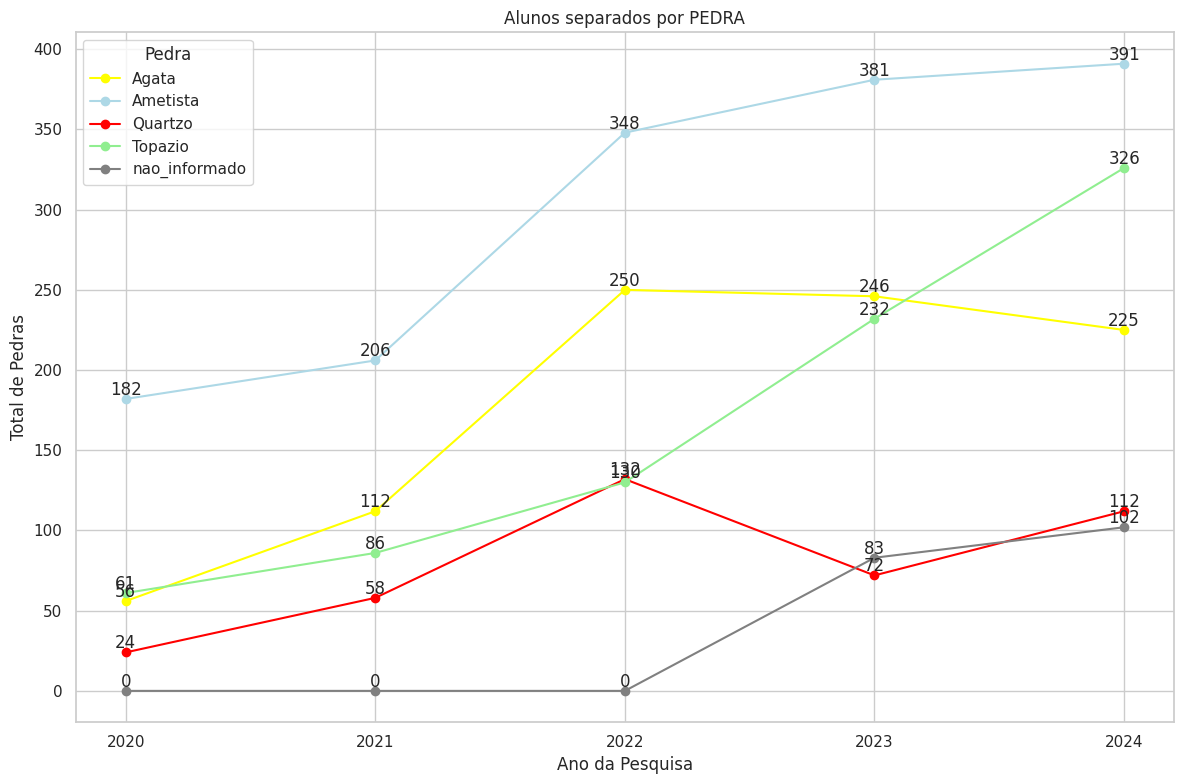

In [252]:
# Criar o gráfico
plt.figure(figsize=(12, 8))

for column in pedra_alunos.columns:
    plt.plot(
        pedra_alunos.index,
        pedra_alunos[column],
        marker='o',
        label=column,
        color=cores.get(column, 'gray')  # Usa a cor definida ou preto como padrão
    )
    for i, count in enumerate(pedra_alunos[column]):
        plt.text(pedra_alunos.index[i], count, str(count), ha='center', va='bottom')

# Configurações do gráfico
plt.title('Alunos separados por PEDRA')
plt.xlabel('Ano da Pesquisa')
plt.ylabel('Total de Pedras')
plt.legend(title='Pedra')
plt.grid(True)
plt.xticks(pedra_alunos.index)
plt.tight_layout()
plt.show()


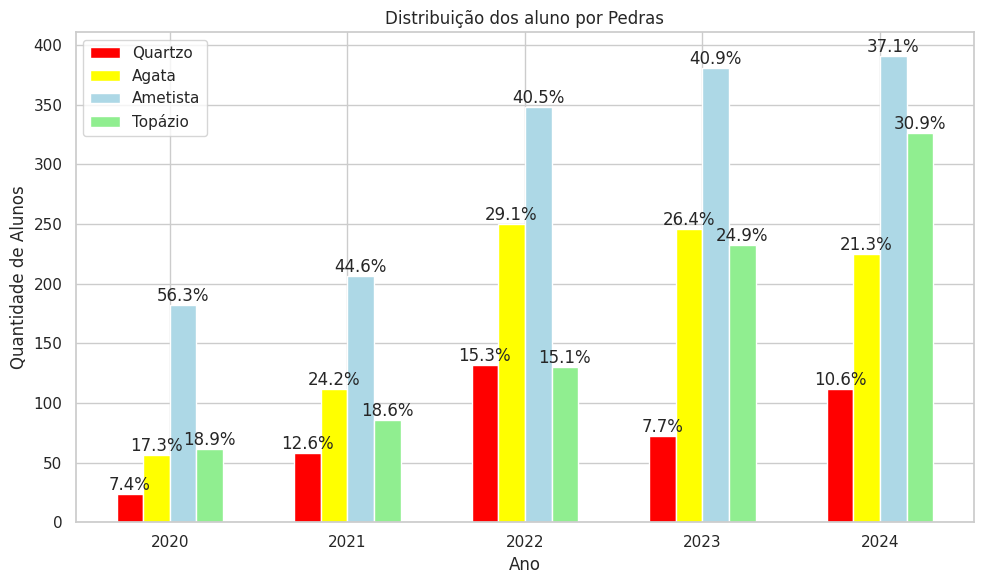

In [253]:
# Filtrando os dados
anos = df_pedra_geral['ano_letivo'].unique()
Quartzo = df_pedra_geral[df_pedra_geral['pedra'] == 'Quartzo'].groupby('ano_letivo').size()
Ametista = df_pedra_geral[df_pedra_geral['pedra'] == 'Ametista'].groupby('ano_letivo').size()
Agata = df_pedra_geral[df_pedra_geral['pedra'] == 'Agata'].groupby('ano_letivo').size()
Topazio = df_pedra_geral[df_pedra_geral['pedra'] == 'Topazio'].groupby('ano_letivo').size()

# Criar um dataframe com os valores contados
df_pedras = (
    pd.DataFrame({
        'ano_letivo': anos
    })
    .merge(Quartzo.rename("Quartzo"), on="ano_letivo", how="left")
    .merge(Ametista.rename("Ametista"), on="ano_letivo", how="left")
    .merge(Agata.rename("Agata"), on="ano_letivo", how="left")
    .merge(Topazio.rename("Topazio"), on="ano_letivo", how="left")
    .fillna(0)  # Substitui valores NaN por 0
)

# Calcular total de pedras por ano
total_pedra = df_pedras[['Quartzo', 'Ametista', 'Agata', 'Topazio']].sum(axis=1)

# Definir largura das barras e posição no eixo X
bar_width = 0.15
mes_index = np.arange(len(anos))

# Criar figura
plt.figure(figsize=(10, 6))
b1 = plt.bar(mes_index, df_pedras["Quartzo"], bar_width, color=cores["Quartzo"], label="Quartzo")
b2 = plt.bar(mes_index + bar_width, df_pedras["Agata"], bar_width, color=cores["Agata"], label="Agata")
b3 = plt.bar(mes_index + 2 * bar_width, df_pedras["Ametista"], bar_width, color=cores["Ametista"], label="Ametista")
b4 = plt.bar(mes_index + 3 * bar_width, df_pedras["Topazio"], bar_width, color=cores["Topazio"], label="Topázio")

# Função para adicionar porcentagens corretamente
def add_percentages(bars, valores, total):
    for bar, valor, total_valor in zip(bars, valores, total):
        height = bar.get_height()
        if total_valor > 0:
            percentage = (valor / total_valor) * 100
            plt.text(bar.get_x() + bar.get_width()/2., height, f'{percentage:.1f}%', ha='center', va='bottom')

# Adicionando porcentagens
add_percentages(b1, df_pedras["Quartzo"], total_pedra)
add_percentages(b2, df_pedras["Agata"], total_pedra)
add_percentages(b3, df_pedras["Ametista"], total_pedra)
add_percentages(b4, df_pedras["Topazio"], total_pedra)

# Ajustando rótulos
plt.title('Distribuição dos aluno por Pedras')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Alunos')
plt.xticks(mes_index + 1.5 * bar_width, anos)

# Adicionando legenda
plt.legend()

# Exibir gráfico
plt.tight_layout()
plt.show()

### 6.2 - Analise Classificação do Aluno por media idade



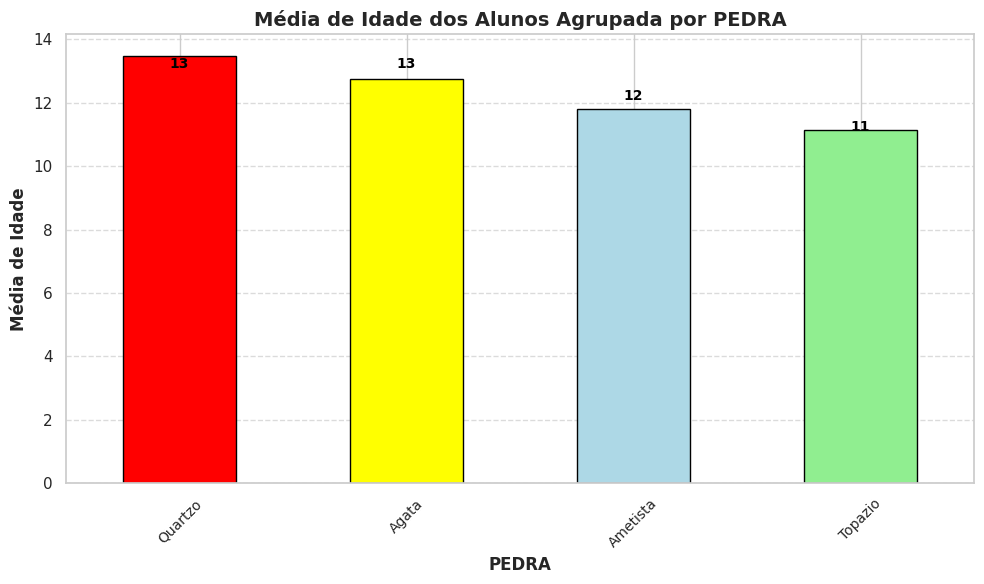

In [257]:
# Calcular a média da idade dos alunos agrupada pela coluna "PEDRA"
media_idade_por_pedra = df_pedra_geral.groupby("pedra")["idade"].mean().dropna()

# Definir a ordem desejada das pedras e suas cores correspondentes
ordem_pedras = ["Quartzo", "Agata", "Ametista", "Topazio"]

# Ordenar os dados para garantir que sigam a ordem definida
media_idade_por_pedra = media_idade_por_pedra.reindex(ordem_pedras)

# Criar a lista de cores seguindo a ordem correta
cores_lista = [cores[pedra] for pedra in ordem_pedras]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
barras = media_idade_por_pedra.plot(kind="bar", color=cores_lista, edgecolor="black")

# Adicionar os valores acima das barras (agora arredondados para inteiro)
for bar in barras.patches:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        round(bar.get_height()),
        f"{round(bar.get_height()):.0f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

# Configurações do gráfico
plt.title("Média de Idade dos Alunos Agrupada por PEDRA", fontsize=14, fontweight="bold")
plt.xlabel("PEDRA", fontsize=12, fontweight="bold")
plt.ylabel("Média de Idade", fontsize=12, fontweight="bold")
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()


### 6.3 - Ponto de Virada


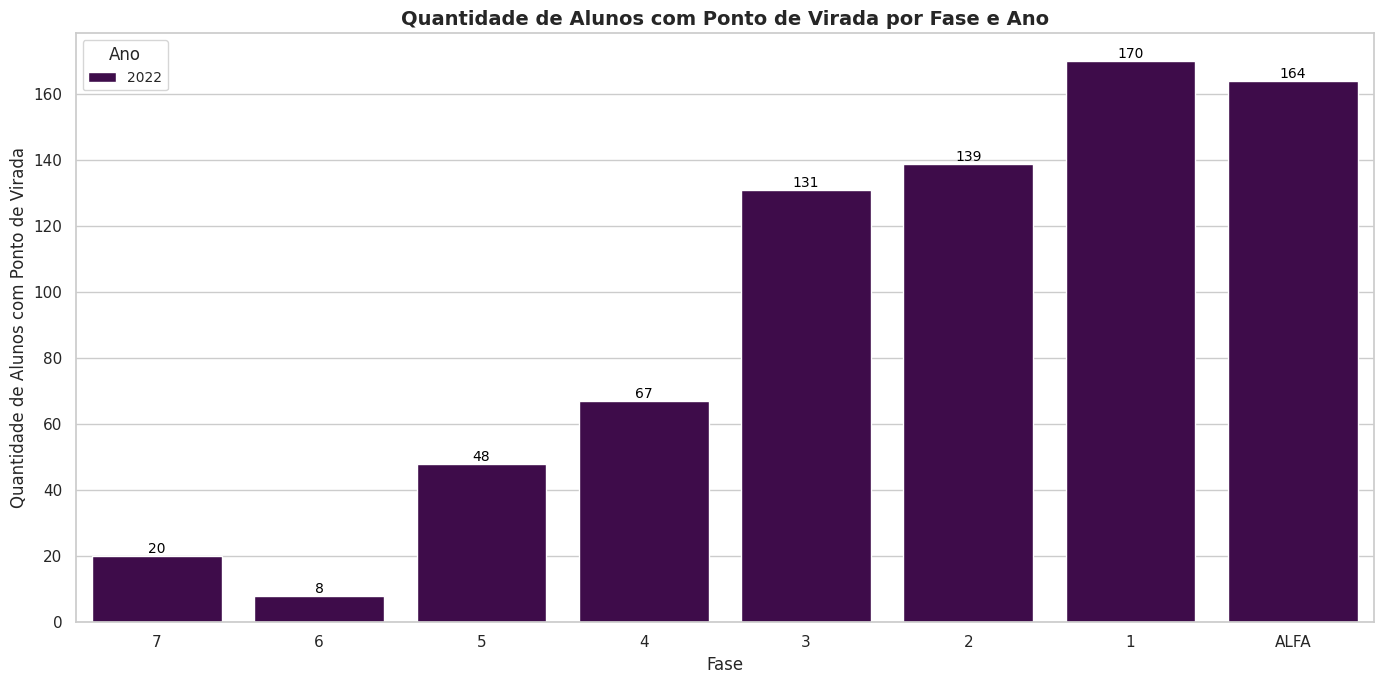

In [258]:
# Configurando o tema
sns.set_theme(style="whitegrid")

# Tamanho da figura
plt.figure(figsize=(14, 7))

# Criando o gráfico
ax = sns.countplot(
    x='fase',
    hue='ano_letivo',
    data=df_alunos[df_alunos['atingiu_pv'] == "Não"],
    palette='viridis'
)

# Adicionando valores acima das barras
for p in ax.patches:
    if p.get_height() > 0:  # Evita exibir valores para barras com altura zero
        ax.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
            textcoords='offset points'
        )

# Ajustes nos rótulos e título
plt.xlabel('Fase', fontsize=12)
plt.ylabel('Quantidade de Alunos com Ponto de Virada', fontsize=12)
plt.title('Quantidade de Alunos com Ponto de Virada por Fase e Ano', fontsize=14, fontweight='bold')

# Ajustar a legenda
plt.legend(title='Ano', fontsize=10, title_fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()


### 6.4 Indice e Indicadores

- **INDE** - Indice do Desenvolvimento Educacional
- **IAA**	 - Indicador de Auto Avaliçao
- **IEG**	 - Indicador de Engajamento
- **IPS**	 - Indicador Psicossocial
- **IDA**  - Indicador de Aprendizagem
- **IPP**  - Indicador Psicopedagogico
- **IPV**	 - Indicador de Ponto de Virada
- **IAN**	 - Indicador de Adequaça o ao Nível

In [256]:
df_alunos.to_csv('df_alunos.csv', index=False)